In [5]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
{-# LANGUAGE TypeFamilies              #-}
import Data.Active
import Diagrams.Prelude
import Diagrams.Backend.Cairo
import IHaskell.Display
import Diagrams.Animation
import Linear.Vector

let n = 1000
let wdth = 1000.0
let hight = 1000.0
let std = map (/n) [0..n]
let pt = circle 0.002 # fc black
rad = 100
draw points = atPoints (map p2 points) $ repeat pt

In [40]:
lerpPts x pts1 pts2 = map unr2 $ zipWith (lerp x) (map r2 pts1) (map r2 pts2) 

In [113]:
anim1 :: Animation B V2 Double
anim1 = pure (\t -> rotateBy (t) (circle 1 ||| circle 1)) <*>  ui

anim2 :: Animation B V2 Double
anim2 = pure (\t -> rotateBy (t) (square 1 ||| square 1)) <*> ui

anim :: Animation B V2 Double
anim = movie [anim1, anim2]
-- anim

In [2]:
-- sc1 = rnds
sc2 = zip std (repeat 0.0)
sc3 = map (\x -> (rad*cos(2*pi*x), rad*sin(2*pi*x))) std
sc4 = sc2

In [3]:
scenes = [sc2,sc3,sc4]

In [87]:
diagram (draw  (lerpPts 0.0002 sc3 sc2))


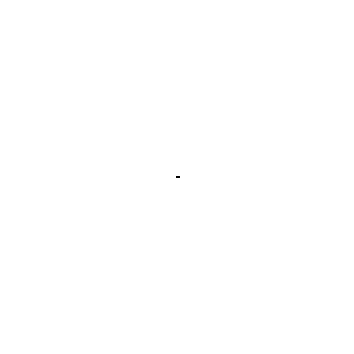

In [100]:
anim :: Animation B V2 Double
anim = pure (\t -> (draw (lerpPts (t) sc3 sc2))) <*> ui
anim